In [2]:
#Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def get_edges(filename,k=20,t1=127,t2=255,corner_num=4,q=0.6,min_dist=50):
    image = filename
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5,5),np.float32)/k
    dst = cv2.filter2D(gray,-1,kernel)
    ret,thresh1 = cv2.threshold(dst,t1,t2,cv2.THRESH_TRUNC)
    plt.imshow(thresh1)
    canny = cv2.Canny(thresh1, 0, 255, 1)
    return canny
    #corners = cv2.goodFeaturesToTrack(canny,corner_num,q,min_dist)
    
    

In [11]:
def get_bounding_rect(canny, image):
    canny_copy = canny
    contours, heirarchy  = cv2.findContours(canny_copy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    w1 = 1
    w2 = 1
    i = 0
    max_y = 0
    c = 0
    for cnt in contours:
        M = cv2.moments(cnt)
        cx = int(M['m10']/(M['m00'] + 0.0001))
        cy = int(M['m01']/(M['m00'] + + 0.0001))
        delta = np.sqrt((cx - image.shape[1])**2 + (cy - image.shape[0])**2)
        area = cv2.contourArea(cnt)

        y = (w1 * delta + w2 * area) + 0.01
        if (y > max_y):
            i = c
            max_y = y
        c += 1
    print(i, "size:", len(contours))
    cnt = contours[i]
    
    cv2.drawContours(image, [cnt], 0, (0,255,0), 3)
    return cv2.boundingRect(cnt)
    
    

In [12]:
def draw_bounding_rect(x,y,w,h,image_name):
    image = cv2.imread(image_name)
    img = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(img)
    

In [13]:
image = cv2.imread("31.png")

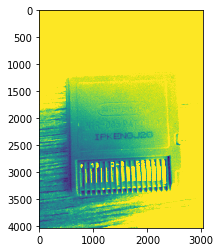

In [17]:
edges = get_edges(image)

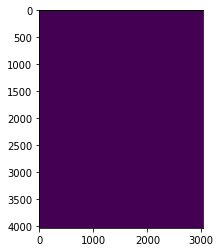

In [15]:
plt.imshow(edges)

In [7]:
x,y,w,h = get_bounding_rect(edges, image)

4


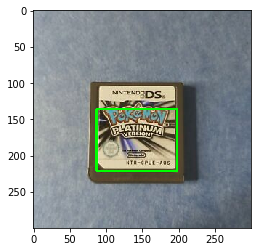

In [18]:
#draw_bounding_rect(x,y,w,h,"test_plat.jpg")